## For a given dataset predict whether customer will exit (Output variable “Exited”) the bank or not using artificial neural network


### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *
warnings.filterwarnings("ignore")

bank_data = pd.read_csv('Churn_Modelling.csv')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
bank_data.isna().sum()            # checking for null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

In [5]:
bank_data.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [6]:
bank_data.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [7]:
bank_data.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


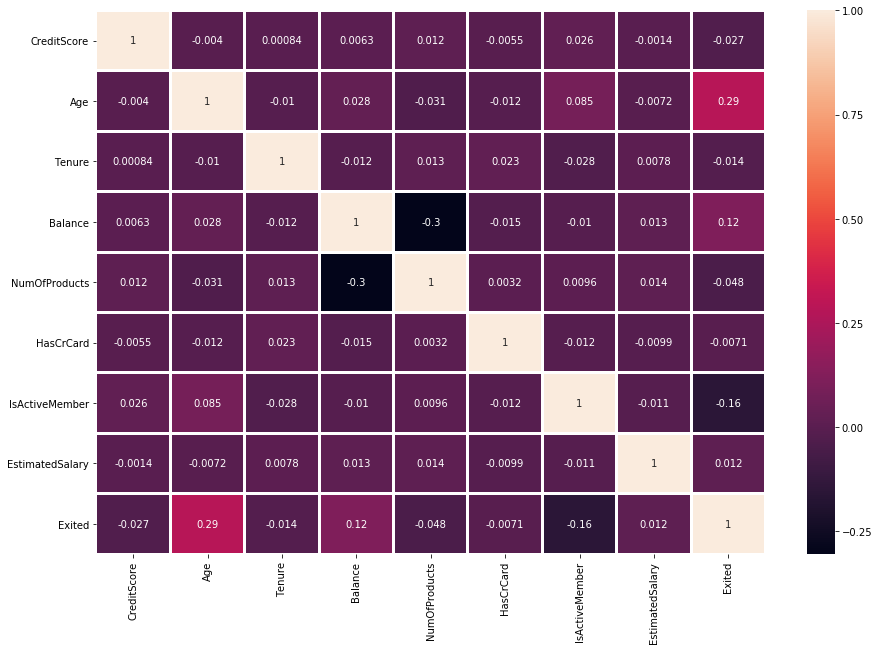

In [8]:
# checking if any of pairs of features that are well correlated to each other so one of it can be removed
plt.figure(figsize=(15,10))
sns.heatmap(bank_data.corr(), annot=True, linewidths=2)
plt.show()

In [9]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data_columns = list(bank_data.columns)
oh_enc_column = 'Geography'
label = data_columns[-1]
features = [col for col in  data_columns if col != oh_enc_column and col != label]

#### Separating out feature matrix & label array

In [11]:
x_values = bank_data.loc[:,features].values
new_x_values = bank_data[oh_enc_column].values
y_values = bank_data.loc[:,label].values

#### Handling categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
oh_enc = OneHotEncoder()
new_x_values = oh_enc.fit_transform(new_x_values.reshape(-1,1)).todense()

lbl_enc_x = LabelEncoder()
x_values[:,1] = lbl_enc_x.fit_transform(x_values[:,1])

x_values = np.append(x_values, new_x_values, 1)

#### Standard scaling feature columns

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

In [14]:
x_values.shape

(10000, 12)

#### Splitting of data as train & test set

In [15]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.7, random_state=0)

### Bulding Artificial Neural Network Model

In [16]:
# for confuguring ann model Sequential is used
from tensorflow.keras import Sequential

# setting parameters for each layer
from tensorflow.keras.layers import Dense 

# creating object for building classifier model
classifier = Sequential()

# input layer
classifier.add(Dense(6, input_dim=12, activation='relu'))

# hidden layer 1
classifier.add(Dense(6, activation='relu'))

# hidden layer 2
classifier.add(Dense(6, activation='relu'))

# output layer
classifier.add(Dense(1, activation='sigmoid'))

# setting parameters such as optmizing algo, loss fn, evaluation formula for classifier model  
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fitting model

In [17]:
batch_size = 32
epochs = 100
# fitting ann model to train set
history = classifier.fit(train_x_values, train_y_values, batch_size=batch_size, epochs=epochs)

Epoch 1/100
7000/7000 [==============================] - 0s 39us/sample - loss: 0.5237 - acc: 0.7977
Epoch 2/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.4779 - acc: 0.7977
Epoch 3/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.4557 - acc: 0.7977
Epoch 4/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.4420 - acc: 0.7977
Epoch 5/100
7000/7000 [==============================] - 0s 25us/sample - loss: 0.4335 - acc: 0.7981
Epoch 6/100
7000/7000 [==============================] - 0s 24us/sample - loss: 0.4275 - acc: 0.8043
Epoch 7/100
7000/7000 [==============================] - 0s 25us/sample - loss: 0.4246 - acc: 0.8130
Epoch 8/100
7000/7000 [==============================] - 0s 25us/sample - loss: 0.4212 - acc: 0.8173
Epoch 9/100
7000/7000 [==============================] - 0s 28us/sample - loss: 0.4186 - acc: 0.8186
Epoch 10/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.4155 - a

7000/7000 [==============================] - 0s 26us/sample - loss: 0.3327 - acc: 0.8659
Epoch 82/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3322 - acc: 0.8656
Epoch 83/100
7000/7000 [==============================] - 0s 25us/sample - loss: 0.3319 - acc: 0.8653
Epoch 84/100
7000/7000 [==============================] - 0s 27us/sample - loss: 0.3324 - acc: 0.8659
Epoch 85/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3319 - acc: 0.8646
Epoch 86/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3322 - acc: 0.8650
Epoch 87/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3319 - acc: 0.8639
Epoch 88/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3314 - acc: 0.8657
Epoch 89/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3320 - acc: 0.8661
Epoch 90/100
7000/7000 [==============================] - 0s 26us/sample - loss: 0.3321 - acc: 

#### Storing predicted values for train set & test set

In [18]:
test_predicted_values = classifier.predict(test_x_values)
test_predicted_values = (test_predicted_values >= 0.5)
train_predicted_values = classifier.predict(train_x_values)
train_predicted_values = (train_predicted_values >= 0.5)

### Evaluating model against train set & test set

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
print('------------------Train Set-----------------\n')
print(f'Confusion matrix:\n {confusion_matrix(train_y_values, train_predicted_values)}')
print(f'\nClassification report:\n {classification_report(train_y_values, train_predicted_values)}')
print('\n-------------------Test Set------------------\n')
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_predicted_values)}')
print(f'\nClassification report:\n {classification_report(test_y_values, test_predicted_values)}')

------------------Train Set-----------------

Confusion matrix:
 [[5334  250]
 [ 693  723]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      5584
           1       0.74      0.51      0.61      1416

    accuracy                           0.87      7000
   macro avg       0.81      0.73      0.76      7000
weighted avg       0.86      0.87      0.86      7000


-------------------Test Set------------------

Confusion matrix:
 [[2245  134]
 [ 289  332]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2379
           1       0.71      0.53      0.61       621

    accuracy                           0.86      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



#### Storing essential objects in pickle file & saving model to HDF5 file

In [20]:
import joblib
with open('DataProcessingBank.pkl', 'wb') as file:
    joblib.dump(features, file)
    joblib.dump(label, file)
    joblib.dump(oh_enc_column, file)
    joblib.dump(lbl_enc_x, file)
    joblib.dump(oh_enc, file)
    joblib.dump(sc_x, file)

# saving model to HDF5 file
classifier.save('ANNModelBank.h5')

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 78        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


### Plotting learning of model against epochs

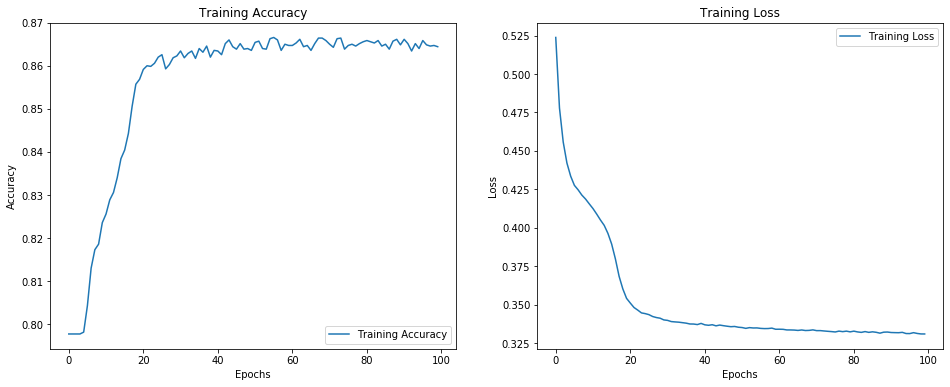

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']

loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()